### Dimensionality Reduction on faces

In this notebook, we visualize a small data set of faces.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn 
import pandas as pd
%matplotlib inline

The file `training_48x48_aligned.txt.gz` contains images and labels of the faces of several people. Use the following code to load the images, replace filename appropriately. If you like you can of course create your pictures.

In [2]:
# Loading of the images
d = np.asarray(pd.read_csv('../../data/faces_48x48_aligned.txt.gz', sep=',',header=None))
y = np.asarray(d[:,0], dtype='int32')
X = d[:,1:] 
y.shape, X.shape #Images are unrolled

((226,), (226, 2304))

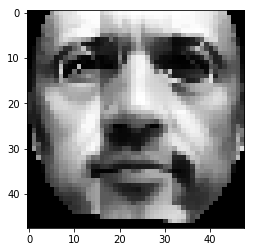

In [3]:
plt.imshow(np.reshape(X[0,:], (48,48)), cmap=plt.get_cmap('gray'))

#### Principle Components, Eigenfaces (side track)

Sidetrack Eigenfaces (optional). Perform a PCA on the transposed matrix `X` and plot the first 16 `scores` as images. That is take the first, second, ... 16th 2304 dimensional score vector and create an image `48x48` image. Google Eigenfaces to understand more.

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [5]:
pca.components_.shape

(226, 2304)

In [6]:
# Taken from scikit-learn docu
def plot_gallery(images, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title('Num {}'.format(i), size=12)
        plt.xticks(())
        plt.yticks(())

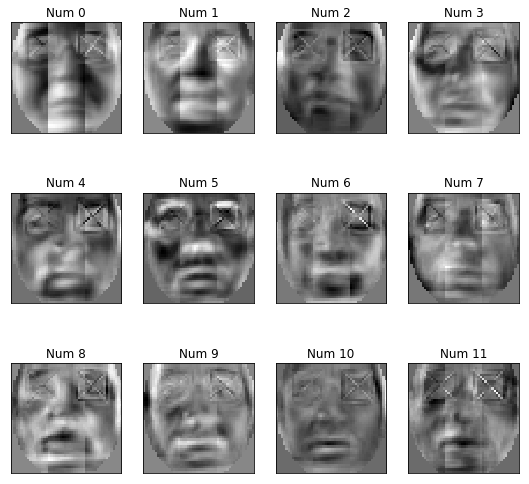

In [7]:
plot_gallery(pca.components_, 48,48)

### Principle Component Analysis

Now use the first 2 `loadings` of the PCA and plot them in a scatter plot and color the by the lables `y`.

In [8]:
pca = PCA(n_components=2, whiten=False)
pca.fit(X)
Y = pca.transform(X)

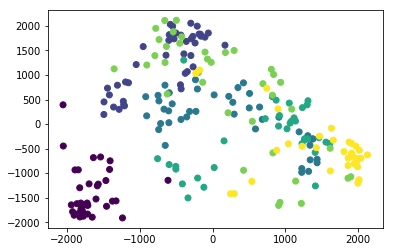

In [9]:
plt.scatter(Y[:,0],Y[:,1], c=y)

### MDS
Now perform a metrical MDS using `sklearn.manifold.MDS` 

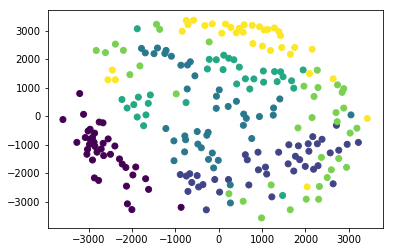

In [10]:
from sklearn.manifold import MDS
mds = MDS(2, metric=True)
res = mds.fit(X)
Y = res.embedding_
plt.scatter(Y[:,0],Y[:,1], c=y)

### TSNE

Now perform a `tSNE` analysis using euclidian distances, between the image. 

Hint: You might need to change the learning rate.

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 226 / 226
[t-SNE] Mean sigma: 633.206276
[t-SNE] Iteration 25: error = 1.6538655, gradient norm = 0.0317390
[t-SNE] Iteration 50: error = 1.3855011, gradient norm = 0.0235855
[t-SNE] Iteration 75: error = 0.8558918, gradient norm = 0.0124723
[t-SNE] Iteration 100: error = 0.7964465, gradient norm = 0.0140146
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.796447
[t-SNE] Iteration 125: error = 0.6963438, gradient norm = 0.0043179
[t-SNE] Iteration 150: error = 0.6750050, gradient norm = 0.0059520
[t-SNE] Iteration 175: error = 0.6887065, gradient norm = 0.0156735
[t-SNE] Iteration 200: error = 0.6941088, gradient norm = 0.0193926
[t-SNE] Iteration 200: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 200 iterations: 0.796447


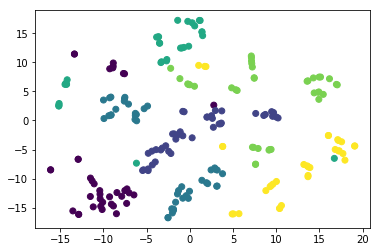

In [11]:
from sklearn.manifold import TSNE
tsne = TSNE(2, perplexity=5, verbose=2, n_iter=1000, learning_rate=100)
Y = tsne.fit_transform(X)
plt.scatter(Y[:,0],Y[:,1], c=y)

### Creating nice plots

We now create a canvas on which we plot the faces based on the positions from the dimension reduction methodsused above.

In [12]:
# Scaling results between 0 and 1
min_1 = Y[:,0].min()
max_1 = Y[:,0].max()
min_2 = Y[:,1].min()
max_2 = Y[:,1].max()
Yn = Y[:]
Yn[:,0] = (Y[:,0] - min_1) / (max_1 - min_1) 
Yn[:,1] = (Y[:,1] - min_2) / (max_2 - min_2)

In [13]:
# Painting on a large canvas
RES = 1000
can = np.zeros((RES,RES))
for i in range(216):
    y_1 = int(Y[i,0] * (RES - 48))
    y_2 = int(Y[i,1] * (RES - 48))
    can[y_1:y_1+48,y_2:y_2+48] = np.reshape(X[i],(48,48))

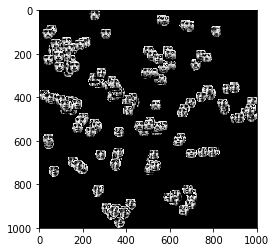

In [14]:
# Save the canvas
plt.imshow(can,cmap=plt.cm.gray)
import scipy
scipy.misc.imsave('tSNE.jpg',can)